In [1]:
import numpy as np
import sys
sys.path.append("../")
from algorithm.koopmanlib.dictionary import PsiNN

In [2]:
basis_function = PsiNN(layer_sizes=[100,100,100], n_psi_train=150)

In [3]:
data_path = r'D:\resDMD\data' 
import scipy.io

In [4]:
# temp = scipy.io.loadmat(data_path+'pendulum_data.mat')
temp = scipy.io.loadmat(data_path + '\\pendulum_data.mat')
# Y = np.concatenate((temp['pbn_lfp'],temp['lgn_lfp']),axis=1)[1
X = temp['DATA'][0:-1,:]
Y = temp['DATA'][1:,:]
print(X.shape)


(359399, 2)


In [5]:
del temp['DATA']

In [6]:
len_all = X.shape[0]
data_x_train = X[:int(0.7*len_all),:]
data_x_valid = X[int(0.7*len_all)+1:,:]

data_y_train = Y[:int(0.7*len_all),:]
data_y_valid = Y[int(0.7*len_all)+1:,:]

In [7]:
data_train = [data_x_train, data_y_train]
data_valid = [data_x_valid, data_y_valid]

In [8]:
## Using solver0
from algorithm.koopmanlib.solver_0 import KoopmanDLSolver # resDMD solver using regression
solver = KoopmanDLSolver(dic=basis_function,
                         target_dim=np.shape(data_train)[-1],
                         reg=0.1)

solver.build(data_train=data_train,
             data_valid=data_valid,
             epochs=50,
             batch_size=170000,
             lr=1e-4,
             log_interval=10,
             lr_decay_factor=.8)

Epoch 1/2
2/2 [==============================] - 7s 1s/step - loss: 22.1518 - val_loss: 3.4050
Epoch 2/2
2/2 [==============================] - 9s 1s/step - loss: 8.3265 - val_loss: 41.5417
number of the outer loop: 0
Epoch 1/2
2/2 [==============================] - 9s 1s/step - loss: 1.1131 - val_loss: 4.8967
Epoch 2/2
2/2 [==============================] - 8s 767ms/step - loss: 3.9955 - val_loss: 0.2164
number of the outer loop: 1
Epoch 1/2
2/2 [==============================] - 9s 2s/step - loss: 0.7279 - val_loss: 3.3694
Epoch 2/2
2/2 [==============================] - 6s 1s/step - loss: 2.6391 - val_loss: 0.0738
number of the outer loop: 2
Epoch 1/2
2/2 [==============================] - 6s 2s/step - loss: 0.3817 - val_loss: 1.9755
Epoch 2/2
2/2 [==============================] - 7s 1s/step - loss: 1.7735 - val_loss: 0.1274
number of the outer loop: 3
Epoch 1/2
2/2 [==============================] - 6s 1s/step - loss: 0.2319 - val_loss: 1.2044
Epoch 2/2
2/2 [======================

In [9]:
## Results from solver0
evalues = solver.eigenvalues.T
efuns = solver.eigenfunctions(X)
kpm_modes = solver.compute_mode().T
N_dict = np.shape(evalues)[0]
Psi_X, Psi_Y = solver.get_basis(data_train[0], data_train[1])

# # Build the Koopman model (this will compute the Koopman matrix K and store it in self.K_reg)
# solver.build(data_train)

# After building the model, you can access the Koopman matrix K
Koopman_matrix_K = solver.K_reg.numpy()

resDMD_DL_outputs0 = {
    'resDMD_DL_outputs': {
        'efuns': efuns,
        'evalues': evalues,
        'kpm_modes': kpm_modes,
        'N_dict': N_dict,
        'Psi_X': Psi_X.numpy(),
        'Psi_Y': Psi_Y.numpy(),
        'K': Koopman_matrix_K,  # Add the Koopman matrix K to the results
    }
}

print(resDMD_DL_outputs0['resDMD_DL_outputs']['evalues'].shape)
print(resDMD_DL_outputs0['resDMD_DL_outputs']['efuns'].shape)


# np.save("solver_0_outputs.npy", resDMD_DL_outputs0, allow_pickle=True)
save_path = 'D:\\resDMD\\data\\'  # Ensure this is a directory
nd = resDMD_DL_outputs0['resDMD_DL_outputs']['evalues'].shape[0]
filename = f'solver0_outputs_{nd}basis.mat'
scipy.io.savemat(save_path + filename, resDMD_DL_outputs0)

(153,)
(359399, 153)


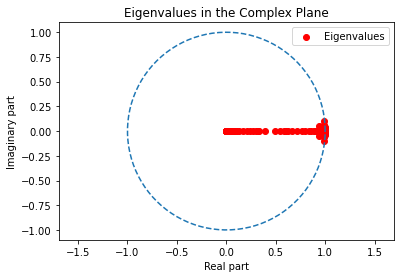

Is Psi_X orthonormal? False
Is Psi_Y orthonormal? False
Are the columns of Psi_X normalized? True
Are the columns of Psi_Y normalized? True
[ 9.99999773e-01-6.38978381e-07j  9.99999773e-01+6.38978381e-07j
  9.99927099e-01+0.00000000e+00j  9.99852433e-01-1.04298747e-02j
  9.99852433e-01+1.04298747e-02j  9.99534324e-01-2.08373730e-02j
  9.99534324e-01+2.08373730e-02j  9.98638959e-01+0.00000000e+00j
  9.98247368e-01-3.10241324e-02j  9.98247368e-01+3.10241324e-02j
  9.98019127e-01-7.55677906e-03j  9.98019127e-01+7.55677906e-03j
  9.97291854e-01+0.00000000e+00j  9.96548365e-01+4.57520843e-04j
  9.96548365e-01-4.57520843e-04j  9.95373987e-01-1.26946607e-02j
  9.95373987e-01+1.26946607e-02j  9.95339655e-01+4.23160330e-02j
  9.95339655e-01-4.23160330e-02j  9.93999923e-01+0.00000000e+00j
  9.93801256e-01+0.00000000e+00j  9.92034287e-01+1.07955155e-02j
  9.92034287e-01-1.07955155e-02j  9.90678005e-01-2.08202829e-02j
  9.90678005e-01+2.08202829e-02j  9.90546826e-01+6.32971413e-02j
  9.90546826e-0

In [12]:
## Plot eigenvalues
import matplotlib.pyplot as plt

# Plot the unit circle for reference
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), linestyle='dashed')

# Plot the real and imaginary parts of the eigenvalues
plt.scatter(evalues.real, evalues.imag, color='red', label='Eigenvalues')

# Set equal scaling for both axes
plt.axis('equal')

# Set the labels
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('Eigenvalues in the Complex Plane')

# Enable the legend
plt.legend()

# Show the plot
plt.show()

## Check if basis is orthonormal or normailized
def is_orthonormal(A, tol=1e-6):
    # A should be orthonormal if A' * A = I
    A_H = np.conj(A).T  # Conjugate transpose for complex-valued A
    product = np.dot(A_H, A)
    I = np.eye(A.shape[1])  # Identity matrix
    return np.allclose(product, I, atol=tol)

# Now, use this function to check orthonormality of Psi_X and Psi_Y
print("Is Psi_X orthonormal?", is_orthonormal(Psi_X))
print("Is Psi_Y orthonormal?", is_orthonormal(Psi_Y))

def are_columns_normalized(A, tol=1e-6):
    # Calculate the norm of each column
    norms = np.linalg.norm(A, axis=0)
    # Check if each norm is close to 1 within the specified tolerance
    return np.allclose(norms, 1, atol=tol)

# Now, use this function to check the normalization of Psi_X and Psi_Y
print("Are the columns of Psi_X normalized?", are_columns_normalized(Psi_X))
print("Are the columns of Psi_Y normalized?", are_columns_normalized(Psi_Y))
print(evalues)


In [ ]:
# Using solver3
from algorithm.koopmanlib.solver_3 import KoopmanDLSolver # resDMD solver using regression
solver = KoopmanDLSolver(dic=basis_function,
                         target_dim=np.shape(data_train)[-1],
                         reg=0.1)

solver.build(data_train=data_train,
             data_valid=data_valid,
             epochs=50,
             batch_size=170000,
             lr=1e-4,
             log_interval=10,
             lr_decay_factor=.8)

In [ ]:
# Results from solver3
evalues = solver.eigenvalues.T
efuns = solver.eigenfunctions(X)
kpm_modes = solver.compute_mode().T
N_dict = np.shape(evalues)[0]
Psi_X, Psi_Y = solver.get_basis(data_train[0], data_train[1])

# # Build the Koopman model (this will compute the Koopman matrix K and store it in self.K_reg)
# solver.build(data_train)

# After building the model, you can access the Koopman matrix K
Koopman_matrix_K = solver.K_reg.numpy()

resDMD_DL_outputs3 = {
    'resDMD_DL_outputs': {
        'efuns': efuns,
        'evalues': evalues,
        'kpm_modes': kpm_modes,
        'N_dict': N_dict,
        'Psi_X': Psi_X.numpy(),
        'Psi_Y': Psi_Y.numpy(),
        'K': Koopman_matrix_K,  # Add the Koopman matrix K to the results
    }
}

# np.save("solver_3_outputs.npy", resDMD_DL_outputs3, allow_pickle=True)
save_path = 'D:\\resDMD\\data\\'  # Ensure this is a directory
nd = resDMD_DL_outputs3['resDMD_DL_outputs']['evalues'].shape[0]
filename = f'solver3_outputs_{nd}basis.mat'
scipy.io.savemat(save_path + filename, resDMD_DL_outputs3)

In [ ]:
# Using solver4
from algorithm.koopmanlib.solver_4 import KoopmanDLSolver # resDMD solver using regression
solver = KoopmanDLSolver(dic=basis_function,
                         target_dim=np.shape(data_train)[-1],
                         reg=0.1)

solver.build(data_train=data_train,
             data_valid=data_valid,
             epochs=1000,
             batch_size=170000,
             lr=1e-4,
             log_interval=10,
             lr_decay_factor=.8)

In [ ]:
# Results from solver4
evalues = solver.eigenvalues.T
efuns = solver.eigenfunctions(X)
kpm_modes = solver.compute_mode().T
N_dict = np.shape(evalues)[0]
Psi_X, Psi_Y = solver.get_basis(data_train[0], data_train[1])

# # Build the Koopman model (this will compute the Koopman matrix K and store it in self.K_reg)
# solver.build(data_train)

# After building the model, you can access the Koopman matrix K
Koopman_matrix_K = solver.K_reg.numpy()

resDMD_DL_outputs4 = {
    'resDMD_DL_outputs': {
        'efuns': efuns,
        'evalues': evalues,
        'kpm_modes': kpm_modes,
        'N_dict': N_dict,
        'Psi_X': Psi_X.numpy(),
        'Psi_Y': Psi_Y.numpy(),
        'K': Koopman_matrix_K,  # Add the Koopman matrix K to the results
    }
}

# np.save("solver_4_outputs.npy", resDMD_DL_outputs4, allow_pickle=True)
save_path = 'D:\\resDMD\\data\\'  # Ensure this is a directory
nd = resDMD_DL_outputs4['resDMD_DL_outputs']['evalues'].shape[0]
filename = f'solver4_outputs_{nd}basis.mat'
scipy.io.savemat(save_path + filename, resDMD_DL_outputs4)

In [ ]:
# # Using solver1
# from algorithm.koopmanlib.solver_1 import KoopmanDLSolver # resDMD solver using regression
# solver = KoopmanDLSolver(dic=basis_function,
#                          target_dim=np.shape(data_train)[-1],
#                          reg=0.1)

# solver.build(data_train=data_train,
#              data_valid=data_valid,
#              epochs=1000,
#              batch_size=170000,
#              lr=1e-4,
#              log_interval=10,
#              lr_decay_factor=.8)

In [ ]:
# # Results from solver1
# evalues = solver.eigenvalues.T
# efuns = solver.eigenfunctions(X)
# kpm_modes = solver.compute_mode().T
# N_dict = np.shape(evalues)[0]
# Psi_X, Psi_Y = solver.get_basis(data_train[0], data_train[1])

# # # Build the Koopman model (this will compute the Koopman matrix K and store it in self.K_reg)
# # solver.build(data_train)

# # After building the model, you can access the Koopman matrix K
# Koopman_matrix_K = solver.K_reg.numpy()

# resDMD_DL_outputs1 = {
#     'resDMD_DL_outputs': {
#         'efuns': efuns,
#         'evalues': evalues,
#         'kpm_modes': kpm_modes,
#         'N_dict': N_dict,
#         'Psi_X': Psi_X.numpy(),
#         'Psi_Y': Psi_Y.numpy(),
#         'K': Koopman_matrix_K,  # Add the Koopman matrix K to the results
#     }
# }

# # np.save("solver_1_outputs.npy", resDMD_DL_outputs1, allow_pickle=True)
# save_path = 'D:\\resDMD\\data\\'  # Ensure this is a directory
# nd = resDMD_DL_outputs1['resDMD_DL_outputs']['evalues'].shape[0]
# filename = f'solver1_outputs_{nd}basis.mat'
# scipy.io.savemat(save_path + filename, resDMD_DL_outputs1)